# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"GermanCredit CSV.csv")

# 2. Check how many records do we have


In [26]:
df.shape


(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

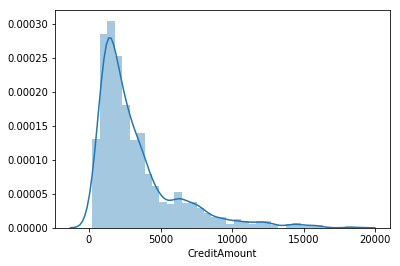

In [22]:
sns.distplot(df['CreditAmount']);

# 3b. Create creditability dataframe

In [32]:
df.head()
df_cred1=df[df['Creditability']==1]
df_cred0=df[df['Creditability']==0]

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [36]:
df_total=pd.concat([df_cred1,df_cred0])
df_total.tail()

,Creditability,CreditAmount,DurationOfCreditInMonths
995,0,1987,24
996,0,2303,24
997,0,12680,21
998,0,6468,12
999,0,6350,30


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

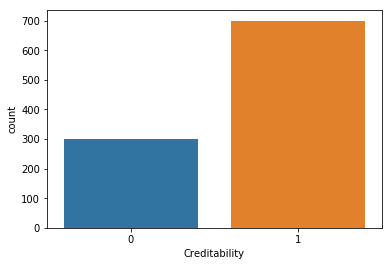

In [37]:
sns.countplot(df_total['Creditability'])

# 6. Prepare input data for the model

In [39]:
from sklearn.model_selection import train_test_split
X=df.drop('Creditability',axis=1)
Y=df['Creditability']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
x_train.head()


,CreditAmount,DurationOfCreditInMonths
820,10961,48
761,2600,18
296,2301,9
564,4272,30
864,5998,40


# 7. Fit logistic regression model

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

# 8. Test accuracy calculation

In [44]:
model_score=model.score(x_test,y_test)
print(model_score)

0.68


# 9. Build a confusion matrix

,Predict 1,Predict 0
Actual 1,195,10
Actual 0,86,9


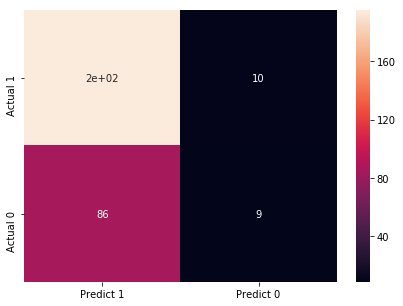

In [46]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["Actual 1","Actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)
df_cm

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults